# Women Tennis

## Data Scientists: Paolo Hilado and Alison Danvers

# Business Problem

Data Scientists are tasked with predicting the players who are likely to win each match based on match play statistics. These include first serve percentage, first serve won, second serve percentage, second serve won, ace, double faults, winner, unforced errors, break points created, break points won, net points attempted and net points won. 

In [1]:
# Load Libraries
import pandas as pd
import numpy as np
import pickle

# Pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# Data cleaning has been done separately on the train and test set after the data split. Split is carried out with 80% train and 20% test.

In [ ]:
# Code used to do data split with 80% train and 20% test.
# train_test_split(X, y, test_size=0.2, random_state=42)

In [2]:
# Load the clean train set.
train = pd.read_excel("WTtrain_clean.xlsx")
# Load the clean test set.
test = pd.read_excel("WTtest_clean.xlsx")

In [50]:
# Check the first few records for the train set.
train.head()

,Result,FSP.1,FSW.1,SSP.1,SSW.1,ACE.1,DBF.1,WNR.1,UFE.1,BPC.1,...,SSP.2,SSW.2,ACE.2,DBF.2,WNR.2,UFE.2,BPC.2,BPW.2,NPA.2,NPW.2
0,1,75,42,25,12,1.0,1.0,13,15,5.0,...,47,13,4.0,3.0,32,41,10.0,2.0,29.0,19.0
1,0,58,22,42,8,3.0,6.0,17,35,5.0,...,49,16,0.0,0.0,14,23,16.0,5.0,17.0,12.0
2,0,65,43,35,18,1.0,2.0,15,37,15.0,...,42,26,6.0,6.0,38,55,9.0,4.0,19.0,13.0
3,0,58,15,42,8,3.0,2.0,15,10,4.0,...,25,5,4.0,2.0,24,9,5.0,3.0,13.0,11.0
4,1,48,26,52,20,4.0,6.0,28,27,5.0,...,40,15,3.0,8.0,32,40,4.0,12.0,12.0,16.0


In [51]:
# Check the first few records for the test set.
test.head()

,Result,FSP.1,FSW.1,SSP.1,SSW.1,ACE.1,DBF.1,WNR.1,UFE.1,BPC.1,...,SSP.2,SSW.2,ACE.2,DBF.2,WNR.2,UFE.2,BPC.2,BPW.2,NPA.2,NPW.2
0,1,62,26,38,10,1.0,5,20,12,8,...,40,14,0.0,2,24,18,7,4,27.0,19.0
1,1,80,25,20,8,0.0,0,12,18,10,...,42,6,2.0,2,14,35,4,3,9.0,5.0
2,0,57,14,43,5,2.0,5,12,32,0,...,43,11,7.0,2,14,4,5,6,2.0,4.0
3,0,61,15,39,11,2.0,4,23,35,6,...,40,9,3.0,4,14,22,8,9,4.0,6.0
4,1,71,20,29,5,4.0,2,16,15,1,...,42,9,0.0,1,15,9,1,6,4.0,6.0


In [52]:
# Check out the shape of the train set.
train.shape # 361 records (80%) and 25 features; 24 explanatory and 1 response variable. 

(361, 25)

In [53]:
# Check out the shape of the test set
test.shape # 91 records (20%) and 25 features; 24 explanatory and 1 response variable. 

(91, 25)

In [54]:
# Double check that there are no missing cases for the train set.
train.isnull().any()

Result    False
FSP.1     False
FSW.1     False
SSP.1     False
SSW.1     False
ACE.1     False
DBF.1     False
WNR.1     False
UFE.1     False
BPC.1     False
BPW.1     False
NPA.1     False
NPW.1     False
FSP.2     False
FSW.2     False
SSP.2     False
SSW.2     False
ACE.2     False
DBF.2     False
WNR.2     False
UFE.2     False
BPC.2     False
BPW.2     False
NPA.2     False
NPW.2     False
dtype: bool

In [55]:
# Double check that there are no missing cases for the test set.
test.isnull().any()

Result    False
FSP.1     False
FSW.1     False
SSP.1     False
SSW.1     False
ACE.1     False
DBF.1     False
WNR.1     False
UFE.1     False
BPC.1     False
BPW.1     False
NPA.1     False
NPW.1     False
FSP.2     False
FSW.2     False
SSP.2     False
SSW.2     False
ACE.2     False
DBF.2     False
WNR.2     False
UFE.2     False
BPC.2     False
BPW.2     False
NPA.2     False
NPW.2     False
dtype: bool

In [3]:
train.columns

Index(['Result', 'FSP.1', 'FSW.1', 'SSP.1', 'SSW.1', 'ACE.1', 'DBF.1', 'WNR.1',
       'UFE.1', 'BPC.1', 'BPW.1', 'NPA.1', 'NPW.1', 'FSP.2', 'FSW.2', 'SSP.2',
       'SSW.2', 'ACE.2', 'DBF.2', 'WNR.2', 'UFE.2', 'BPC.2', 'BPW.2', 'NPA.2',
       'NPW.2'],
      dtype='object')

In [4]:
# Standardize the explanatory variables (continuous) for the train set.
# Assigning feature labels to variable continuous_vars.
varz = ['FSP.1', 'FSW.1', 'SSP.1', 'SSW.1', 'ACE.1', 'DBF.1', 'WNR.1',
       'UFE.1', 'BPC.1', 'BPW.1', 'NPA.1', 'NPW.1', 'FSP.2', 'FSW.2', 'SSP.2',
       'SSW.2', 'ACE.2', 'DBF.2', 'WNR.2', 'UFE.2', 'BPC.2', 'BPW.2', 'NPA.2',
       'NPW.2']

# Initialize StandardScaler.
scaler = StandardScaler()

# Fit scaler to the continuous variables and transform them.
train[varz] = scaler.fit_transform(train[varz])
train.head(5)

,Result,FSP.1,FSW.1,SSP.1,SSW.1,ACE.1,DBF.1,WNR.1,UFE.1,BPC.1,...,SSP.2,SSW.2,ACE.2,DBF.2,WNR.2,UFE.2,BPC.2,BPW.2,NPA.2,NPW.2
0,1,1.443518,1.425362,-1.456902,0.089555,-0.707642,-0.956503,-0.698982,-0.74668,-0.143944,...,1.003051,0.301452,0.559971,-0.166887,0.982264,1.260251,1.088966,-0.980832,1.892277,1.055519
1,0,-0.611904,-0.547249,0.598502,-0.689465,0.102824,1.157737,-0.300195,0.91312,-0.143944,...,1.215241,0.897205,-0.952558,-1.345102,-0.583671,-0.098261,2.622981,-0.287373,0.609678,0.157016
2,0,0.234446,1.523993,-0.247841,1.258084,-0.707642,-0.533655,-0.499588,1.07910,2.381027,...,0.472577,2.883049,1.316235,1.011329,1.504243,2.316871,0.833297,-0.518526,0.823445,0.285373
3,0,-0.611904,-1.237664,0.598502,-0.689465,0.102824,-0.533655,-0.499588,-1.16163,-0.396442,...,-1.331034,-1.287223,0.559971,-0.559625,0.286293,-1.154881,-0.189379,-0.749679,0.182146,0.028658
4,1,-1.820976,-0.152727,1.807563,1.647594,0.508056,1.157737,0.796469,0.24920,-0.143944,...,0.260388,0.698621,0.181839,1.796805,0.982264,1.184778,-0.445048,1.330699,0.075262,0.670446


In [5]:
# Standardize the explanatory variables (continuous) for the train set.
# Assigning feature labels to variable continuous_vars.
varz = ['FSP.1', 'FSW.1', 'SSP.1', 'SSW.1', 'ACE.1', 'DBF.1', 'WNR.1',
       'UFE.1', 'BPC.1', 'BPW.1', 'NPA.1', 'NPW.1', 'FSP.2', 'FSW.2', 'SSP.2',
       'SSW.2', 'ACE.2', 'DBF.2', 'WNR.2', 'UFE.2', 'BPC.2', 'BPW.2', 'NPA.2',
       'NPW.2']

# Initialize StandardScaler.
scaler = StandardScaler()

# Fit scaler to the continuous variables and transform them.
test[varz] = scaler.fit_transform(test[varz])
test.head(5)

,Result,FSP.1,FSW.1,SSP.1,SSW.1,ACE.1,DBF.1,WNR.1,UFE.1,BPC.1,...,SSP.2,SSW.2,ACE.2,DBF.2,WNR.2,UFE.2,BPC.2,BPW.2,NPA.2,NPW.2
0,1,0.119964,-0.088027,-0.119964,-0.374131,-0.672048,0.678214,-0.050316,-1.220707,0.500154,...,0.351212,0.329722,-1.077291,-0.542649,0.288044,-0.505325,0.412900,-0.512142,2.136008,1.312970
1,1,2.303316,-0.181172,-2.303316,-0.744195,-1.008812,-1.406837,-0.846616,-0.687928,0.931567,...,0.564993,-1.074005,-0.271094,-0.542649,-0.712414,0.806316,-0.422076,-0.805254,-0.155870,-0.759285
2,0,-0.486522,-1.205767,0.486522,-1.299291,-0.335284,0.678214,-0.846616,0.555222,-1.225497,...,0.671884,-0.196676,1.744396,-0.542649,-0.712414,-1.585501,-0.143750,0.074083,-1.047156,-0.907303
3,0,-0.001333,-1.112622,0.001333,-0.189099,-0.335284,0.261204,0.248297,0.821611,0.068742,...,0.351212,-0.547608,0.132004,0.211260,-0.712414,-0.196704,0.691225,0.953421,-0.792503,-0.611266
4,1,1.211640,-0.646897,-1.211640,-1.299291,0.338244,-0.572816,-0.448466,-0.954318,-1.009791,...,0.564993,-0.547608,-1.077291,-0.919604,-0.612368,-1.199724,-1.257051,0.074083,-0.792503,-0.611266


In [59]:
train.head()

,Result,FSP.1,FSW.1,SSP.1,SSW.1,ACE.1,DBF.1,WNR.1,UFE.1,BPC.1,...,SSP.2,SSW.2,ACE.2,DBF.2,WNR.2,UFE.2,BPC.2,BPW.2,NPA.2,NPW.2
0,1,1.443518,1.425362,-1.456902,0.089555,-0.707642,-0.956503,-0.698982,-0.74668,-0.143944,...,1.003051,0.301452,0.559971,-0.166887,0.982264,1.260251,1.088966,-0.980832,1.892277,1.055519
1,0,-0.611904,-0.547249,0.598502,-0.689465,0.102824,1.157737,-0.300195,0.91312,-0.143944,...,1.215241,0.897205,-0.952558,-1.345102,-0.583671,-0.098261,2.622981,-0.287373,0.609678,0.157016
2,0,0.234446,1.523993,-0.247841,1.258084,-0.707642,-0.533655,-0.499588,1.07910,2.381027,...,0.472577,2.883049,1.316235,1.011329,1.504243,2.316871,0.833297,-0.518526,0.823445,0.285373
3,0,-0.611904,-1.237664,0.598502,-0.689465,0.102824,-0.533655,-0.499588,-1.16163,-0.396442,...,-1.331034,-1.287223,0.559971,-0.559625,0.286293,-1.154881,-0.189379,-0.749679,0.182146,0.028658
4,1,-1.820976,-0.152727,1.807563,1.647594,0.508056,1.157737,0.796469,0.24920,-0.143944,...,0.260388,0.698621,0.181839,1.796805,0.982264,1.184778,-0.445048,1.330699,0.075262,0.670446


In [61]:
test.head()

,Result,FSP.1,FSW.1,SSP.1,SSW.1,ACE.1,DBF.1,WNR.1,UFE.1,BPC.1,...,SSP.2,SSW.2,ACE.2,DBF.2,WNR.2,UFE.2,BPC.2,BPW.2,NPA.2,NPW.2
0,1,0.119964,-0.088027,-0.119964,-0.374131,-0.672048,0.678214,-0.050316,-1.220707,0.500154,...,0.351212,0.329722,-1.077291,-0.542649,0.288044,-0.505325,0.412900,-0.512142,2.136008,1.312970
1,1,2.303316,-0.181172,-2.303316,-0.744195,-1.008812,-1.406837,-0.846616,-0.687928,0.931567,...,0.564993,-1.074005,-0.271094,-0.542649,-0.712414,0.806316,-0.422076,-0.805254,-0.155870,-0.759285
2,0,-0.486522,-1.205767,0.486522,-1.299291,-0.335284,0.678214,-0.846616,0.555222,-1.225497,...,0.671884,-0.196676,1.744396,-0.542649,-0.712414,-1.585501,-0.143750,0.074083,-1.047156,-0.907303
3,0,-0.001333,-1.112622,0.001333,-0.189099,-0.335284,0.261204,0.248297,0.821611,0.068742,...,0.351212,-0.547608,0.132004,0.211260,-0.712414,-0.196704,0.691225,0.953421,-0.792503,-0.611266
4,1,1.211640,-0.646897,-1.211640,-1.299291,0.338244,-0.572816,-0.448466,-0.954318,-1.009791,...,0.564993,-0.547608,-1.077291,-0.919604,-0.612368,-1.199724,-1.257051,0.074083,-0.792503,-0.611266


In [6]:
# Separate the explanatory variables from the response variable for the train set.
Xtrain = train.iloc[:, 1:]
ytrain = train['Result']

In [7]:
# Separate the explanatory variables from the response variable for the test set.
Xtest = test.iloc[:, 1:]
ytest = test['Result']

## Train the Model to predict winners of the match using the explanatory variables.

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score

# Define the Parameters for the Decision Tree Model.
param_grid = {
    'criterion': ['gini', 'entropy'],       # Split criterion ('gini' or 'entropy')
    'max_depth': [3, 5, 10, 15],         # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],        # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],          # Minimum number of samples required to be at a leaf node
    'max_features': ['log2', 'sqrt'],       # Number of features to consider when looking for the best split
    'random_state': [42]                    # Random seed for reproducibility
}

# Load the Decision Tree model.
classifier = DecisionTreeClassifier()


# Create a Recall scoring function.
accuracy_scorer = make_scorer(accuracy_score)

# Create a GridSearchCV instance.
grid_search = GridSearchCV(classifier, param_grid, scoring=accuracy_scorer, cv=5)

# Doing a grid search to get the best performing model.
grid_search.fit(Xtrain.values, ytrain.values)

# Get the parameters and recall score of the best performing model.
best_params = grid_search.best_params_
best_accuracy_scorer = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best CV accuracy Score:", best_accuracy_scorer)

Best Parameters: {'criterion': 'entropy', 'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10, 'random_state': 42}
Best CV accuracy Score: 0.7782724505327245


In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Grid Search for Logistic Regression.
# Define the parameters for the model.
param_grid = {
    'penalty': ['l1', 'l2'],            # Regularization type ('l1' or 'l2')
    'C': [0.01, 0.1, 1, 10, 100],       # Inverse of regularization strength
    'solver': ['liblinear', 'saga'],    # Algorithm to use for optimization
    'max_iter': [50, 100, 200, 300],        # Maximum number of iterations
    'random_state': [42]                # Random seed for reproducibility
}

# Load a Logistic Regression model.
logreg = LogisticRegression()

# Create a Recall scoring function.
accuracy_scorer = make_scorer(accuracy_score)

# Create a GridSearchCV instance.
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring=accuracy_scorer)

# Doing a grid search to get the best performing model.
grid_search.fit(Xtrain, ytrain)

# Get the best parameters and recall score of the best performing model.
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Show the results
print("Best Hyperparameters found: " + str(best_params))
print("Best CV Accuracy Score: " + str(best_score))

Best Hyperparameters found: {'C': 10, 'max_iter': 100, 'penalty': 'l1', 'random_state': 42, 'solver': 'saga'}
Best CV Accuracy Score: 0.9334094368340944


In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
from sklearn.neural_network import MLPClassifier

# Define the parameters for the MLP Model.
param_grid = {"hidden_layer_sizes": [(2), (3), (4), (5), (10)], # we consider a small number for hidden layers as we have a small number of observations
              "activation": ['identity', 'tanh', 'logistic', 'relu'],
              "solver": ['adam', 'sgd'],
              "max_iter": [100, 200, 400],
              "alpha": [0.01, 0.001],
              "random_state": [42]}

# Specifying our Classifier.
classifier = MLPClassifier()

# Create a Recall scoring function.
accuracy_scorer = make_scorer(accuracy_score)

# Create a GridSearchCV instance.
grid_search = GridSearchCV(classifier, param_grid, scoring=accuracy_scorer, cv=5)

# Using GridSearchCV to determine the best model.
grid_search.fit(Xtrain, ytrain)

# Get the best parameters and best F1 score
best_params = grid_search.best_params_
best_accuracy_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best CV Recall Score:", best_accuracy_score)

Best Parameters: {'activation': 'identity', 'alpha': 0.01, 'hidden_layer_sizes': 4, 'max_iter': 400, 'random_state': 42, 'solver': 'adam'}
Best CV Recall Score: 0.9334474885844749


In [66]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define the XGBoost regressor
xgb_classifier = xgb.XGBClassifier()

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.3],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5]
}

# Perform cross-validation grid search
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(Xtrain, ytrain)

# Using GridSearchCV to determine the best model.
grid_search.fit(Xtrain, ytrain)

# Get the best parameters and its Recall score.
best_params = grid_search.best_params_
best_accuracy_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best CV Accuracy Score:", best_accuracy_score)

Best Parameters: {'colsample_bytree': 0.9, 'gamma': 0.1, 'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 100, 'reg_alpha': 0.1, 'reg_lambda': 0, 'subsample': 0.8}
Best CV Accuracy Score: 0.955593607305936


Test accuracy Score = 0.9120879120879121
tp: 43 fn: 4 fp: 4 tn: 40


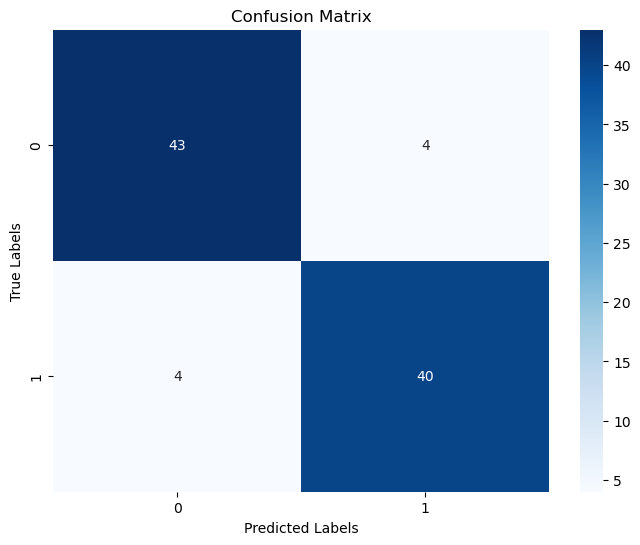

In [12]:
# Let us use the best hyperparameters for our XGBoost model.
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

model = xgb.XGBClassifier(colsample_bytree= 0.9, gamma=0.1, 
                          learning_rate= 0.3, max_depth= 5, n_estimators= 100, reg_alpha= 0.1, 
                          reg_lambda= 0, subsample= 0.8, random_state = 42)
clf = model.fit(Xtrain, ytrain)

# Make predictions using the model on the test set.
y_pred = clf.predict(Xtest)

# Calculate model performance such as F1, Recall, and Precision. 
from sklearn import metrics
print("Test accuracy Score =",metrics.accuracy_score(ytest, y_pred))

# Define class labels.
class_labels = np.unique(ytest)

# Create a confusion matrix.
cm = confusion_matrix(ytest, y_pred, labels=class_labels)

# Proper labelling of outcomes.
tp, fn, fp, tn= confusion_matrix(ytest, y_pred, labels=class_labels).ravel()
print("tp:", tp,"fn:", fn,"fp:",fp,"tn:", tn )

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

## The XGBoost Model is observed to have a 0.91 classification accuracy. Furthermore, it performs well given the number of true positives and true negatives reflected in the confusion matrix. This will be the model that will be used to predict winners based on match play statistics.

In [13]:
# Save the model to a file for future use.
with open('XGBoostWTennis.pkl', 'wb') as file:
    pickle.dump(clf, file)